<a href="https://colab.research.google.com/github/Bix4UMD/BIOI611_lab/blob/main/docs/BIOI611_ballgown_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Isoform-level differential expression analysis with Ballgown.

This notebook is based on the reference: https://www.bioconductor.org/packages/release/bioc/vignettes/ballgown/inst/doc/ballgown.html

## Install R package

In [ ]:
## Took around 17 minutes
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("ballgown")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.26), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'ballgown'

also installing the dependencies ‘plogr’, ‘png’, ‘formatR’, ‘abind’, ‘SparseArray’, ‘RSQLite’, ‘KEGGREST’, ‘lambda.r’, ‘futile.options’, ‘S4Arrays’, ‘DelayedArray’, ‘MatrixGenerics’, ‘AnnotationDbi’, ‘annotate’, ‘futile.logger’, ‘snow’, ‘BH’, ‘locfit’, ‘bitops’, ‘Rhtslib’, ‘SummarizedExperiment’, ‘cigarillo’, ‘RCurl’, ‘rjson’, ‘BiocGenerics’, ‘genefilter’, ‘BiocParallel’, ‘matrixStats’, ‘edgeR’, ‘statmod’, ‘XML’, ‘XVector’, ‘Biostrings’, ‘Rsamtools’, ‘GenomicAlignments’, ‘BiocIO’, ‘restfulr’, ‘GenomicRanges’, ‘IRanges’, ‘S4Vectors’, ‘sva’, ‘limma’, ‘rtracklayer’, ‘Biobase’, ‘Seqinfo’


Old package

## Understand the folder with example data

In [ ]:
library(ballgown)
data_directory = system.file('extdata', package='ballgown') # automatically finds ballgown's installation directory
# examine data_directory:
data_directory


Attaching package: ‘ballgown’


The following object is masked from ‘package:base’:

    structure




[1] "/usr/local/lib/R/site-library/ballgown/extdata"

In [ ]:
list.files(data_directory)

[1] "annot.gtf.gz"              "hg19_genes_small.gtf.gz"  
 [3] "sample01"                  "sample02"                 
 [5] "sample03"                  "sample04"                 
 [7] "sample05"                  "sample06"                 
 [9] "sample07"                  "sample08"                 
[11] "sample09"                  "sample10"                 
[13] "sample11"                  "sample12"                 
[15] "sample13"                  "sample14"                 
[17] "sample15"                  "sample16"                 
[19] "sample17"                  "sample18"                 
[21] "sample19"                  "sample20"                 
[23] "tiny.genes.results.gz"     "tiny.isoforms.results.gz" 
[25] "tiny2.genes.results.gz"    "tiny2.isoforms.results.gz"

In [ ]:
list.files(paste0(data_directory, "/sample01"))

[1] "e_data.ctab" "e2t.ctab"    "i_data.ctab" "i2t.ctab"    "t_data.ctab"

| File            | Level               | Purpose                           |
| --------------- | ------------------- | --------------------------------- |
| **e2t.ctab**    | Exon → Transcript   | Maps each exon to transcript(s)   |
| **i2t.ctab**    | Intron → Transcript | Maps each intron to transcript(s) |
| **t_data.ctab** | Transcript          | Expression + structural data      |
| **e_data.ctab** | Exon                | Exon expression levels            |
| **i_data.ctab** | Intron              | Intron expression levels          |


In [ ]:
list.files(file.path())

In [ ]:
# make the ballgown object:
bg = ballgown(dataDir=data_directory, samplePattern='sample', meas='all')
bg

Thu Nov 13 22:22:51 2025

Thu Nov 13 22:22:51 2025: Reading linking tables

Thu Nov 13 22:22:51 2025: Reading intron data files

Thu Nov 13 22:22:51 2025: Merging intron data

Thu Nov 13 22:22:51 2025: Reading exon data files

Thu Nov 13 22:22:51 2025: Merging exon data

Thu Nov 13 22:22:51 2025: Reading transcript data files

Thu Nov 13 22:22:51 2025: Merging transcript data

Wrapping up the results

Thu Nov 13 22:22:51 2025



ballgown instance with 100 transcripts and 20 samples

## Accessing assembly data

A ballgown object has six slots: structure, expr, indexes, dirs, mergedDate, and meas.

Exon, intron, and transcript structures are easily extracted from the main ballgown object:



### Structure

In [ ]:
structure(bg)$exon


GRanges object with 633 ranges and 2 metadata columns:
        seqnames            ranges strand |        id transcripts
           <Rle>         <IRanges>  <Rle> | <integer> <character>
    [1]       18 24412069-24412331      * |        12          10
    [2]       22 17308271-17308950      + |        55          25
    [3]       22 17309432-17310226      + |        56          25
    [4]       22 18121428-18121652      + |        88          35
    [5]       22 18138428-18138598      + |        89          35
    ...      ...               ...    ... .       ...         ...
  [629]       22 51221929-51222113      - |      3777        1294
  [630]       22 51221319-51221473      - |      3782        1297
  [631]       22 51221929-51222162      - |      3783        1297
  [632]       22 51221929-51222168      - |      3784        1301
  [633]        6 31248149-31248334      * |      3794        1312
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

In [ ]:
structure(bg)$intron


GRanges object with 536 ranges and 2 metadata columns:
        seqnames            ranges strand |        id         transcripts
           <Rle>         <IRanges>  <Rle> | <integer>         <character>
    [1]       22 17308951-17309431      + |        33                  25
    [2]       22 18121653-18138427      + |        57                  35
    [3]       22 18138599-18185008      + |        58                  35
    [4]       22 18185153-18209442      + |        59                  35
    [5]       22 18385514-18387397      - |        72                  41
    ...      ...               ...    ... .       ...                 ...
  [532]       22 51216410-51220615      - |      2750 c(1294, 1297, 1301)
  [533]       22 51220776-51221928      - |      2756                1294
  [534]       22 51220780-51221318      - |      2757                1297
  [535]       22 51221474-51221928      - |      2758                1297
  [536]       22 51220780-51221928      - |      2759    

In [ ]:
structure(bg)$trans


GRangesList object of length 100:
$`10`
GRanges object with 1 range and 2 metadata columns:
      seqnames            ranges strand |        id transcripts
         <Rle>         <IRanges>  <Rle> | <integer> <character>
  [1]       18 24412069-24412331      * |        12          10
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

$`25`
GRanges object with 2 ranges and 2 metadata columns:
      seqnames            ranges strand |        id transcripts
         <Rle>         <IRanges>  <Rle> | <integer> <character>
  [1]       22 17308271-17308950      + |        55          25
  [2]       22 17309432-17310226      + |        56          25
  -------
  seqinfo: 3 sequences from an unspecified genome; no seqlengths

$`35`
GRanges object with 4 ranges and 2 metadata columns:
      seqnames            ranges strand |        id transcripts
         <Rle>         <IRanges>  <Rle> | <integer> <character>
  [1]       22 18121428-18121652      + |        88          3

### expr


The expr slot is a list that contains tables of expression data for the genomic features. These tables are very similar to the *_data.ctab Tablemaker output files. Ballgown implements the following syntax to access components of the expr slot:


```
*expr(ballgown_object_name, <EXPRESSION_MEASUREMENT>)
```



where * is either e for exon, i for intron, t for transcript, or g for gene, and is an expression-measurement column name from the appropriate .ctab file. Gene-level measurements are calculated by aggregating the transcript-level measurements for that gene. All of the following are valid ways to extract expression data from the bg ballgown object:



In [ ]:
transcript_fpkm = texpr(bg, 'FPKM')
transcript_cov = texpr(bg, 'cov')
whole_tx_table = texpr(bg, 'all')
exon_mcov = eexpr(bg, 'mcov')
junction_rcount = iexpr(bg)
whole_intron_table = iexpr(bg, 'all')
gene_expression = gexpr(bg)

### Indexes

In [ ]:
pData(bg) = data.frame(id=sampleNames(bg), group=rep(c(1,0), each=10))


In [ ]:
pData(bg)

id,group
<chr>,<dbl>
sample01,1
sample02,1
sample03,1
sample04,1
sample05,1
sample06,1
sample07,1
sample08,1
sample09,1


### Plotting transcript structures




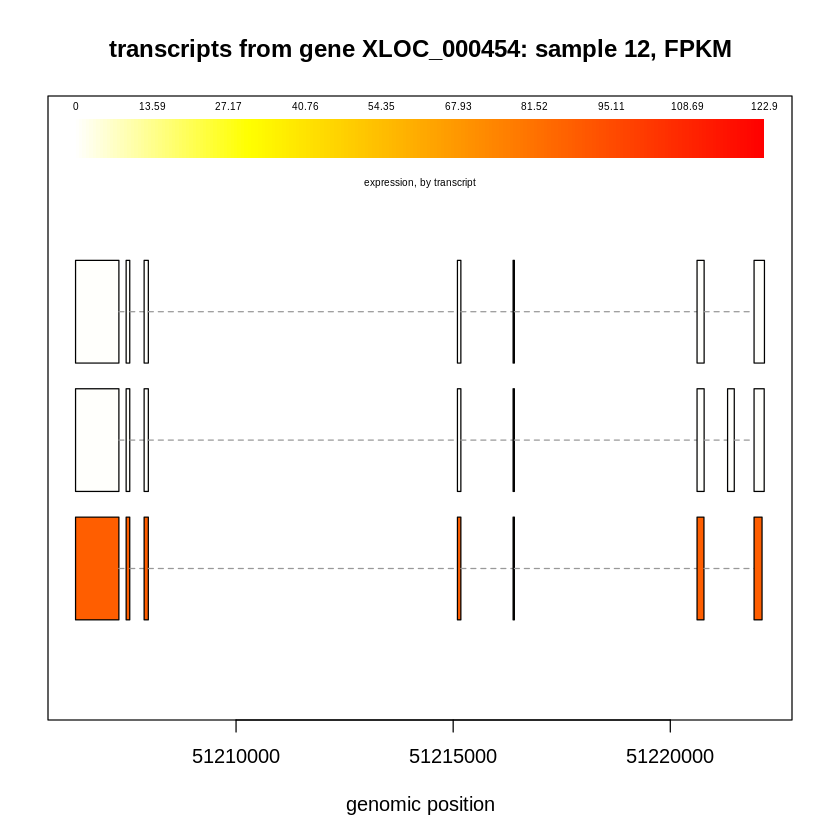

In [ ]:
plotTranscripts(gene='XLOC_000454', gown=bg, samples='sample12',
    meas='FPKM', colorby='transcript',
    main='transcripts from gene XLOC_000454: sample 12, FPKM')

It is also possible to plot several samples at once:



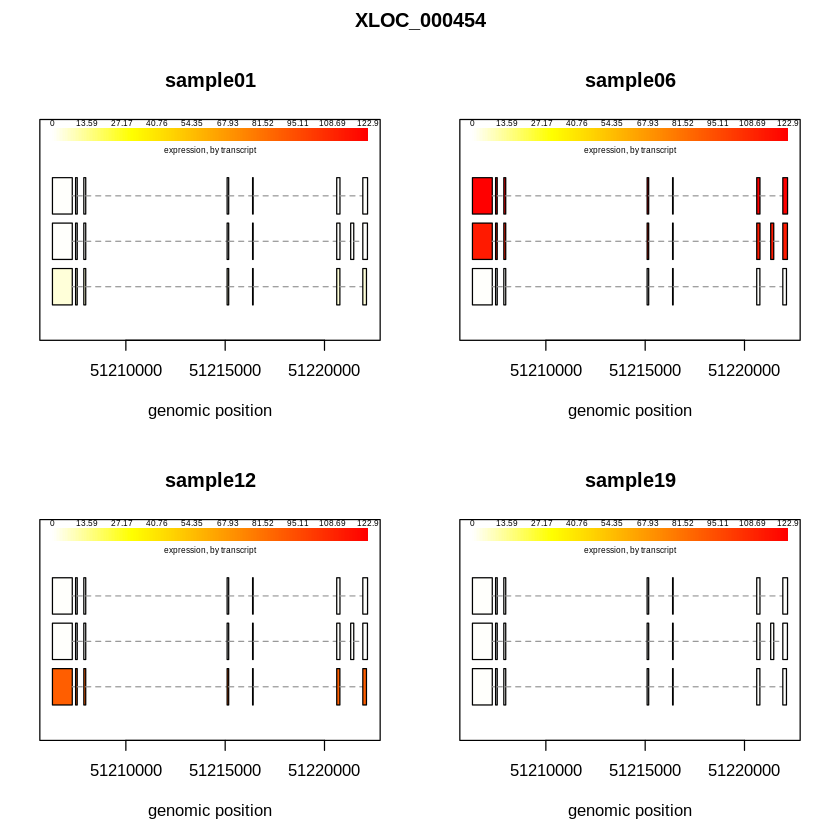

In [ ]:
plotTranscripts('XLOC_000454', bg,
    samples=c('sample01', 'sample06', 'sample12', 'sample19'),
    meas='FPKM', colorby='transcript')

You can also make side-by-side plots comparing mean abundances between groups (here, 0 and 1):



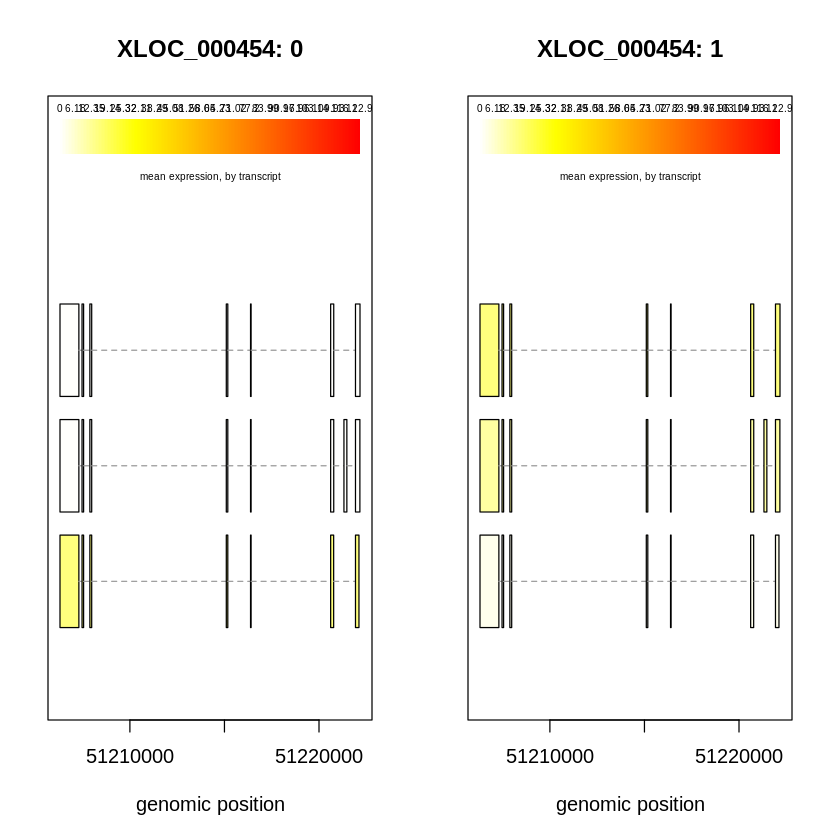

In [ ]:
plotMeans('XLOC_000454', bg, groupvar='group', meas='FPKM', colorby='transcript')

## Differential expression analysis

Ballgown provides a wide selection of simple, fast statistical methods for testing whether transcripts are differentially expressed between experimental conditions or across a continuous covariate (such as time).



In [ ]:
stat_results = stattest(bg, feature='transcript',
                   meas='FPKM', covariate='group',
                   getFC=TRUE)


In [ ]:
results_transcripts <- data.frame(geneNames = geneNames(bg),
                                  geneIDs = geneIDs(bg),
                                  transcriptNames = transcriptNames(bg),
                                  stat_results)

In [ ]:
head(results_transcripts)

,geneNames,geneIDs,transcriptNames,feature,id,fc,pval,qval
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
10,,XLOC_000010,TCONS_00000010,transcript,10,3.193499,0.01381576,0.10521233
25,,XLOC_000014,TCONS_00000017,transcript,25,1.549093,0.26773622,0.79114975
35,,XLOC_000017,TCONS_00000020,transcript,35,4.388626,0.01085070,0.08951825
41,,XLOC_000246,TCONS_00000598,transcript,41,1.440519,0.47108019,0.90253747
45,,XLOC_000019,TCONS_00000024,transcript,45,1.714340,0.08402948,0.48934813
67,,XLOC_000255,TCONS_00000613,transcript,67,2.518524,0.27317385,0.79114975


In [ ]:
results_transcripts <- results_transcripts[order(results_transcripts$qval), ]

In [ ]:
head(results_transcripts, 10)

,geneNames,geneIDs,transcriptNames,feature,id,fc,pval,qval
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1225,,XLOC_000440,TCONS_00001129,transcript,1225,5.67437122,1.035753e-05,0.001025395
980,,XLOC_000179,TCONS_00000452,transcript,980,6.25344921,2.514632e-05,0.001244743
469,,XLOC_000101,TCONS_00000244,transcript,469,119.29999938,2.398681e-04,0.007915648
695,,XLOC_000354,TCONS_00000883,transcript,695,0.21950959,3.302059e-04,0.008172596
1012,,XLOC_000409,TCONS_00001041,transcript,1012,0.24664434,1.527175e-03,0.030238073
123,,XLOC_000029,TCONS_00000059,transcript,123,0.01603345,2.097875e-03,0.034614939
961,,XLOC_000176,TCONS_00000435,transcript,961,4.96074399,2.736075e-03,0.038695918
880,,XLOC_000531,TCONS_00001277,transcript,880,29.40485236,3.272859e-03,0.040501628
1063,,XLOC_000197,TCONS_00000487,transcript,1063,3.12988187,4.555313e-03,0.050108442


In [ ]:
results_transcripts[results_transcripts$geneIDs == "XLOC_000101", ]

,geneNames,geneIDs,transcriptNames,feature,id,fc,pval,qval
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
469,,XLOC_000101,TCONS_00000244,transcript,469,119.299999,0.0002398681,0.007915648
477,,XLOC_000101,TCONS_00000252,transcript,477,3.128184,0.4511803632,0.902537469


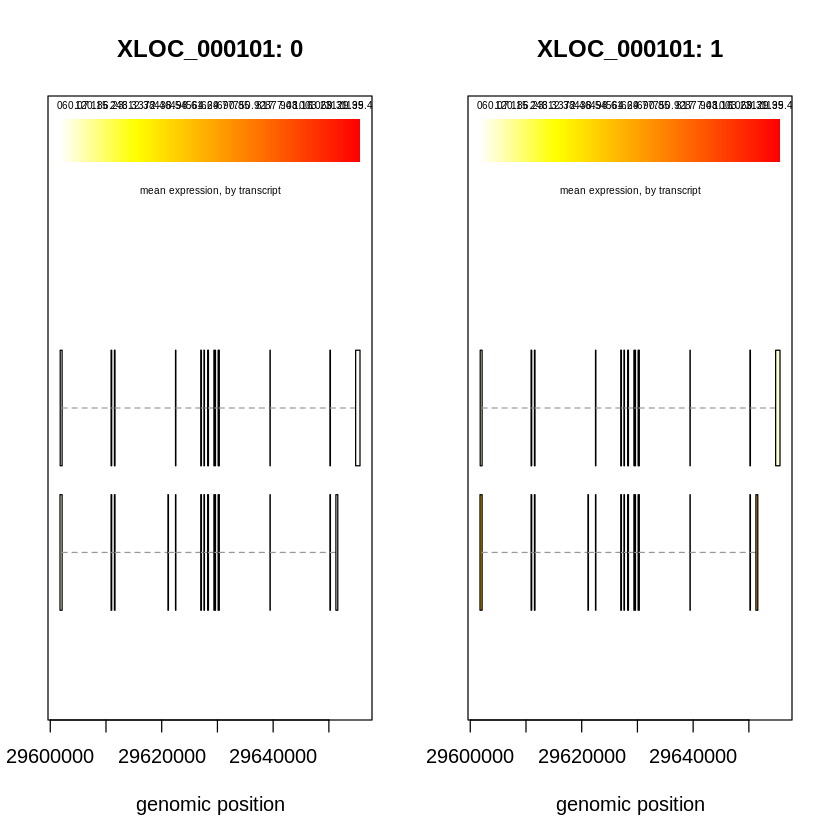

In [ ]:
plotMeans('XLOC_000101', bg, groupvar='group', meas='FPKM', colorby='transcript')

## Reference

https://www.bioconductor.org/packages/release/bioc/vignettes/ballgown/inst/doc/ballgown.html